In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime

# Configure inline display of plots (for Jupyter Notebook)
%matplotlib inline

In [9]:
# Set the date range for data download
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2024,1,1)

# Download stock data for Tesla, Ford, and General Motors within the specified date range
tesla = yf.download('TSLA',start=start,end=end)
ford = yf.download('F',start,end)
gm = yf.download('GM',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


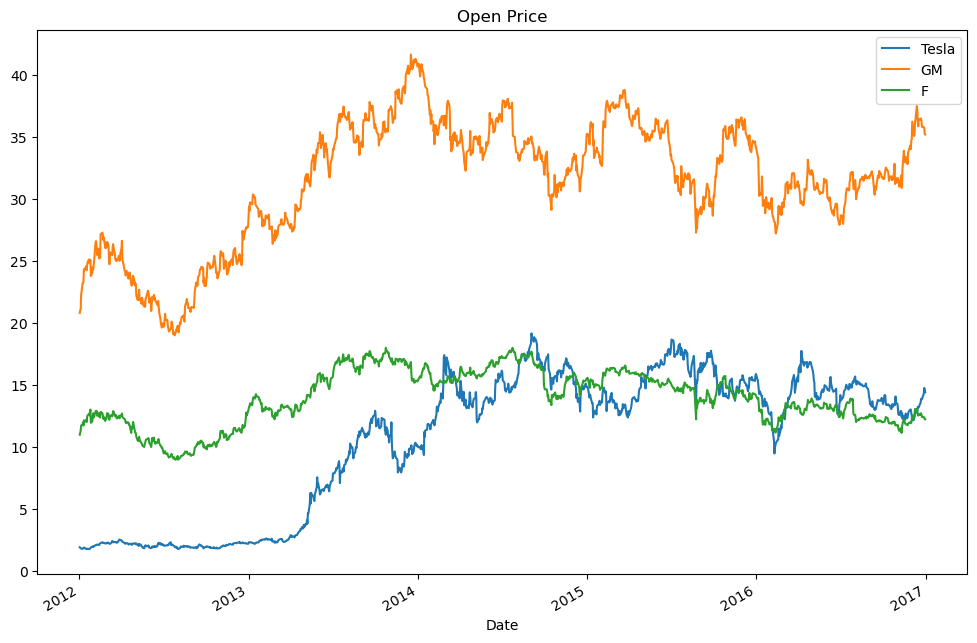

In [8]:
# Plot the 'Open' price for each stock
tesla['Open'].plot(label='Tesla',figsize=(12,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='F')

# Add a legend to the plot to label each line
plt.legend();

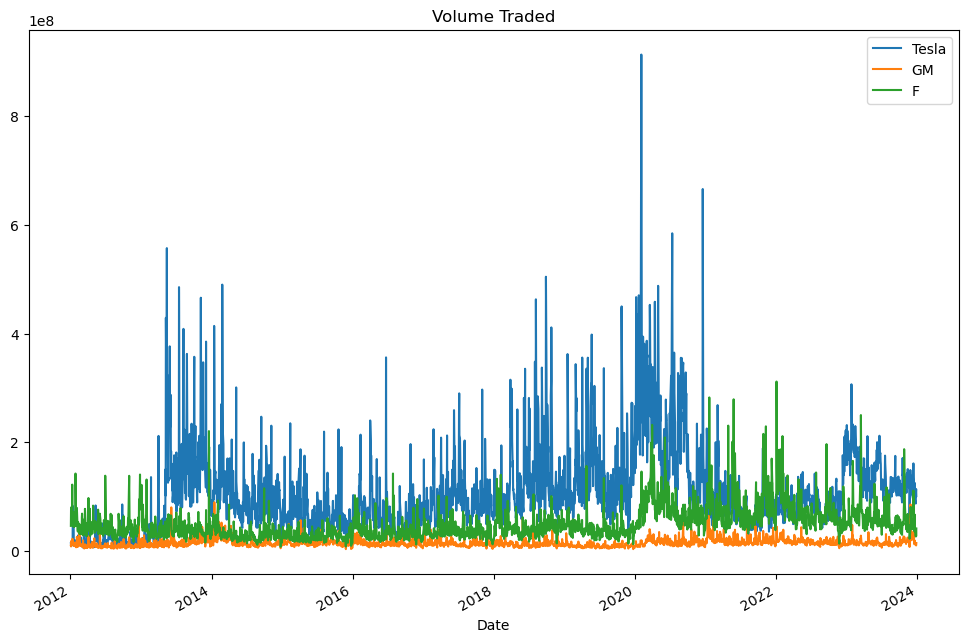

In [10]:
# Plot the 'Volume' of shares traded for each stock over time
tesla['Volume'].plot(label='Tesla',figsize=(12,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='F')

# Add a legend to distinguish each stock in the plot
plt.legend();

In [11]:
# Find and display the date on which Ford had its highest trading volume
ford['Volume'].idxmax()

Timestamp('2022-01-04 00:00:00')

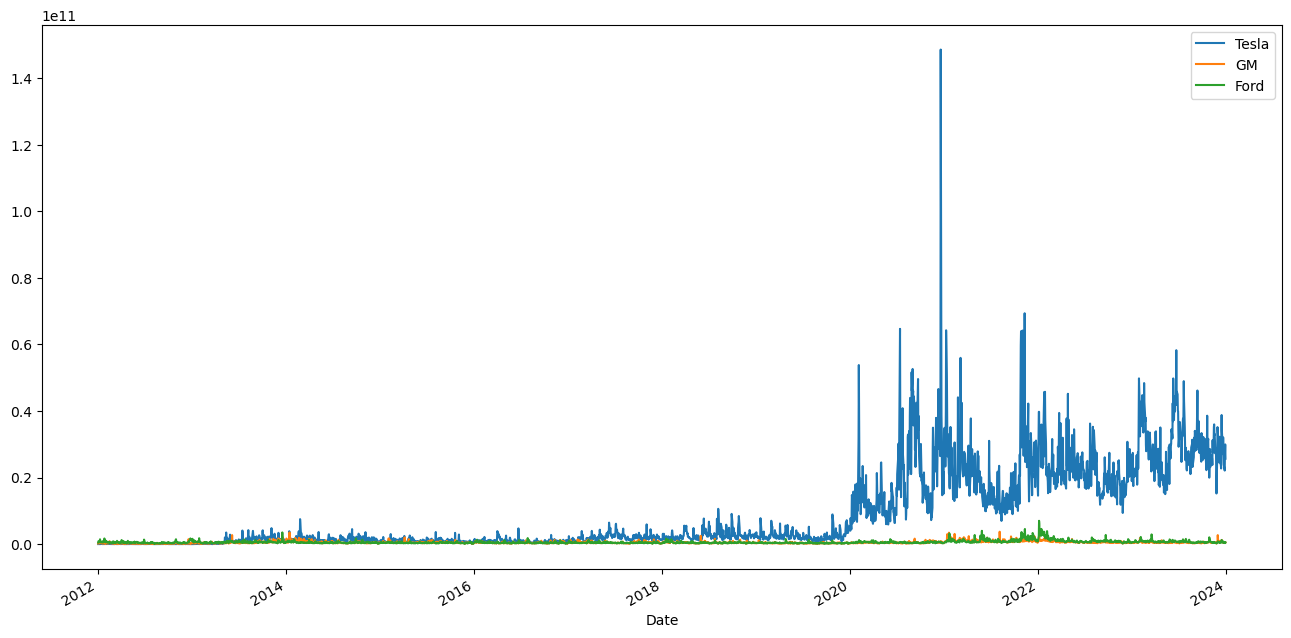

In [13]:
# Calculate 'Total Traded' for each stock as the product of 'Open' price and 'Volume' (this shows total trading value)
tesla["Total Traded"] = tesla['Open']*tesla['Volume']
ford["Total Traded"] = ford['Open']*ford['Volume']
gm["Total Traded"] = gm['Open']*gm['Volume']

# Plot the 'Total Traded' values to compare trading activity among the stocks
tesla["Total Traded"].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')

# Add a legend to distinguish each stock in the plot
plt.legend();

In [14]:
# Find the date with the highest 'Total Traded' value for Tesla (highest trading value day)
tesla['Total Traded'].idxmax()

Timestamp('2020-12-18 00:00:00')

<Axes: xlabel='Date'>

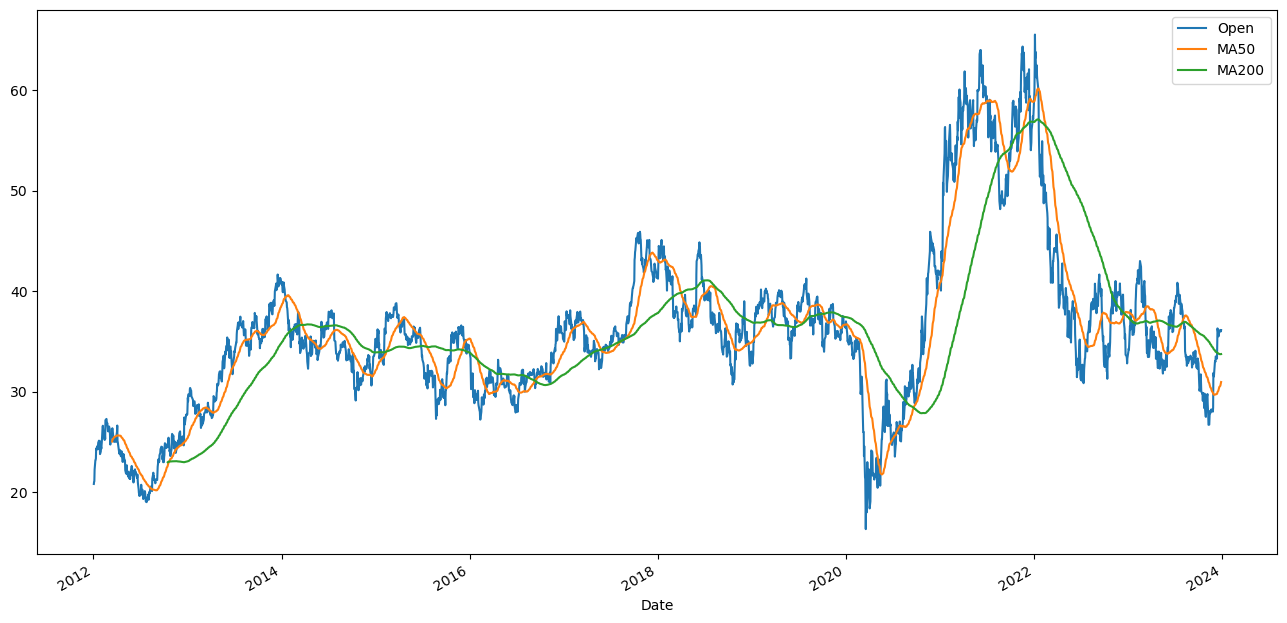

In [15]:
# Calculate the 50-day and 200-day moving averages for GM's 'Open' prices
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200']= gm['Open'].rolling(200).mean()

# Plot GM's 'Open' price along with the 50-day and 200-day moving averages
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

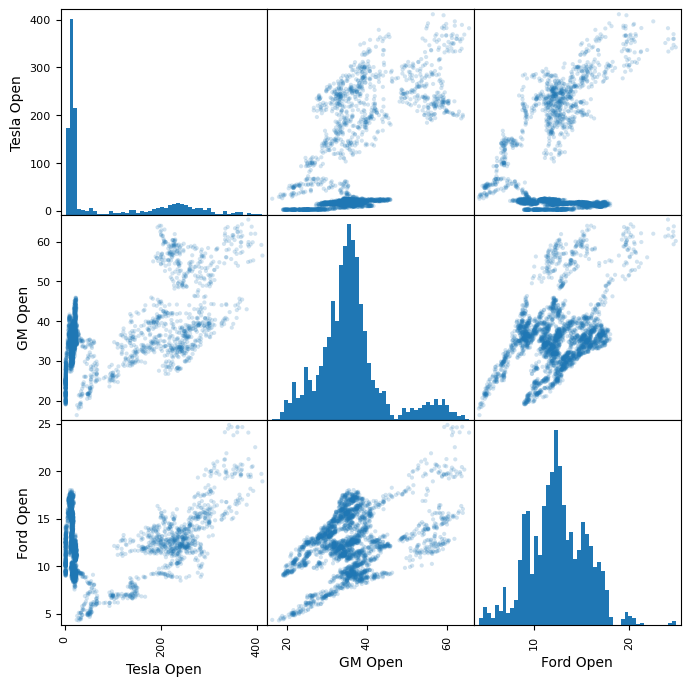

In [16]:
# Import scatter_matrix for visualizing correlations between multiple stocks
from pandas.plotting import scatter_matrix

# Combine the 'Open' prices of Tesla, GM, and Ford into one DataFrame for analysis
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open', 'GM Open' , 'Ford Open']

# Create a scatter matrix plot to visualize the correlations between the 'Open' prices of the three stocks
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

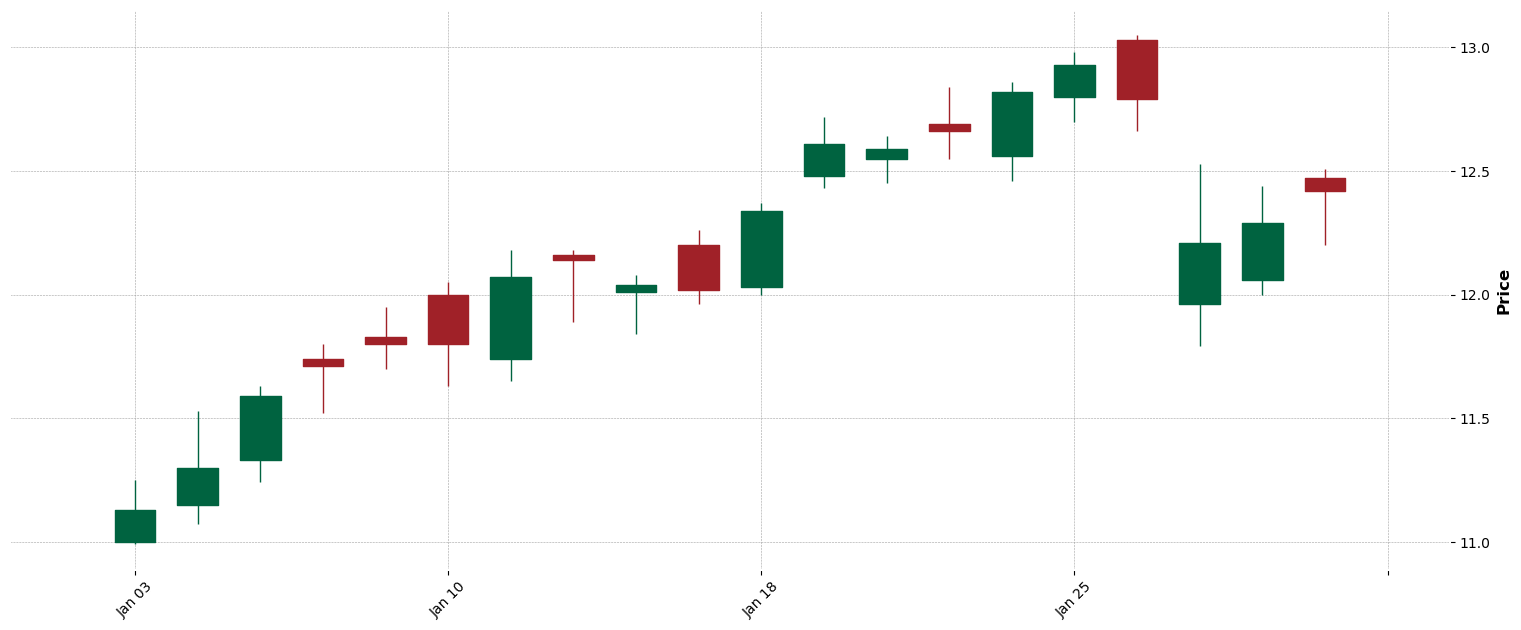

In [38]:
# Import mplfinance for advanced plotting of financial data, such as candlestick charts
import mplfinance as mpf

# Ensure that the index of the 'ford' DataFrame is in datetime format for mplfinance compatibility
ford.index = pd.to_datetime(ford.index)

# Plot a candlestick chart for Ford's stock data from January 1, 2012, to January 31, 2012
# Using the 'charles' style and setting the figure size to (20, 8)
mpf.plot(ford.loc['2012-01-01':'2012-01-31'], type='candle',style='charles',figsize=(20, 8))

In [40]:
# Reset the index for Ford's data for January 2012 to make the 'Date' a regular column
ford_reset = ford.loc['2012-01'].reset_index()

In [27]:
# Calculate daily percentage returns for Tesla, Ford, and GM by finding the daily percentage change in closing prices
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

<Axes: >

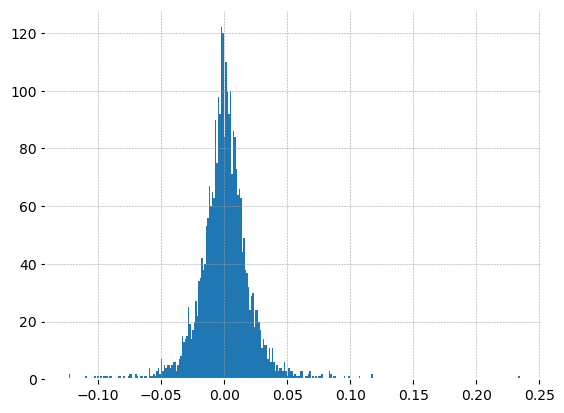

In [26]:
# Plot histogram of Ford's daily returns using 300 bins for higher granularity
ford['returns'].hist(bins=300)

<Axes: >

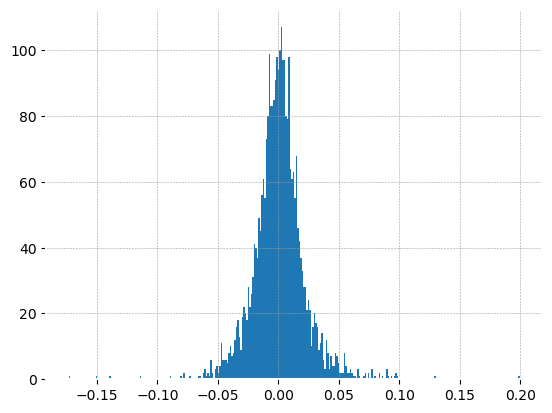

In [28]:
# Plot histogram of GM's daily returns using 300 bins
gm['returns'].hist(bins=300)

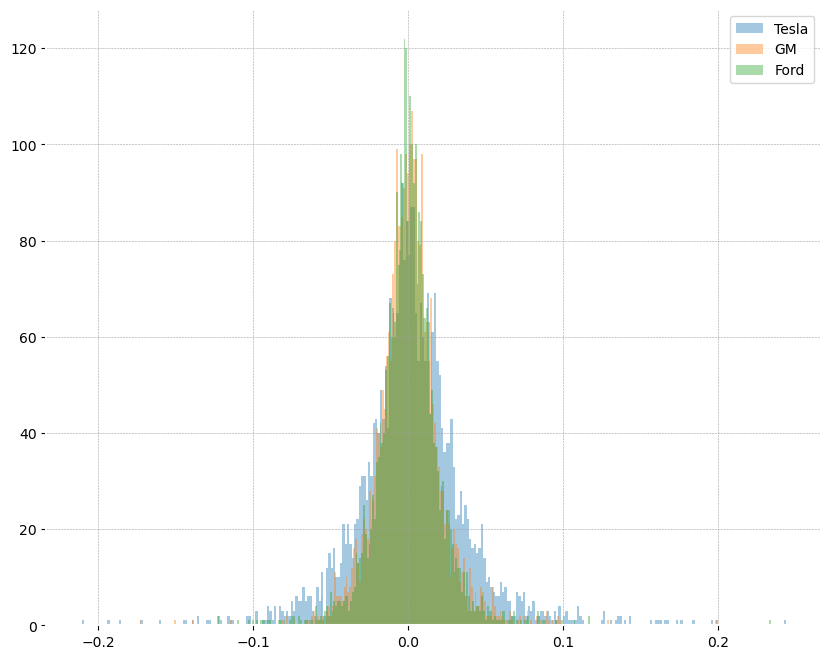

In [42]:
# Plot histograms for daily returns of Tesla, GM, and Ford on the same figure for comparison
# Each histogram uses 300 bins and a semi-transparent overlay (alpha=0.4)
tesla['returns'].hist(bins=300,label='Tesla',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=300,label='GM',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=300,label='Ford',figsize=(10,8),alpha=0.4)

# Add a legend to differentiate each company's histogram
plt.legend()

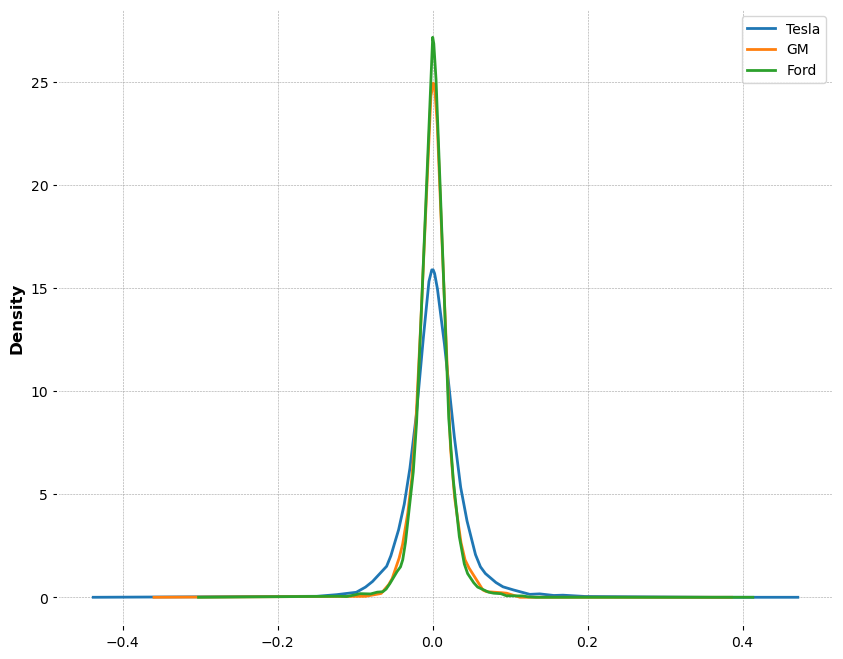

In [43]:
# Plot kernel density estimates (KDE) for daily returns, providing a smoothed curve for comparison of return distributions
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))

# Add a legend to label each KDE plot
plt.legend()

<Axes: >

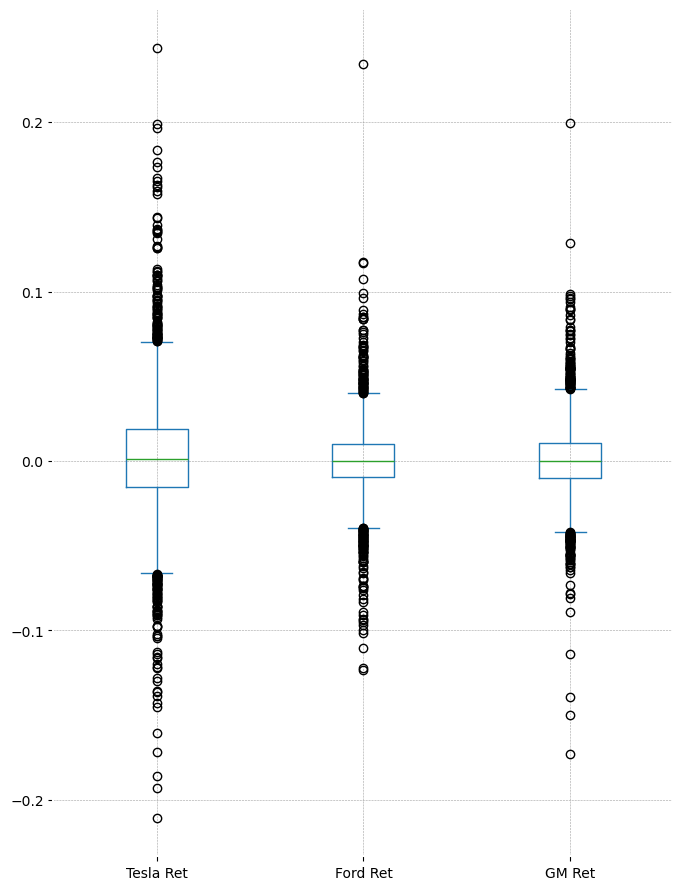

In [31]:
# Combine return data for Tesla, Ford, and GM into a single DataFrame
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)

# Rename columns for easier identification in plots
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']

# Plot a box plot to show the distribution of returns for each company
# A box plot provides a summary that includes median, quartiles, and potential outliers
box_df.plot(kind='box',figsize=(8,11))

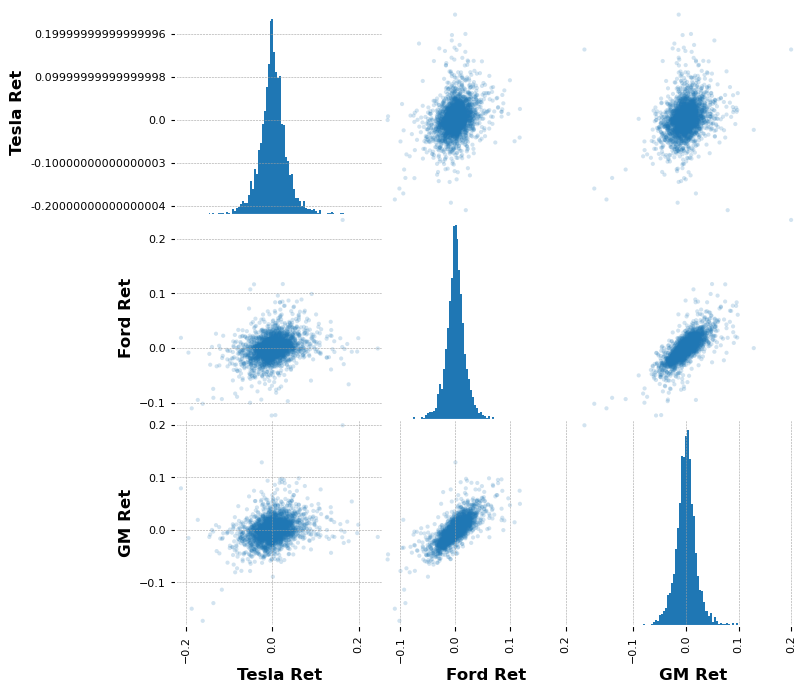

In [47]:
# Create a scatter matrix (pair plot) to visualize relationships between returns of each company
# The alpha parameter makes points semi-transparent, and hist_kwds sets the histogram bin size
scatter_matrix(box_df, figsize=(8,8),alpha=0.2, hist_kwds={'bins':100});

<Axes: xlabel='Ford Ret', ylabel='GM Ret'>

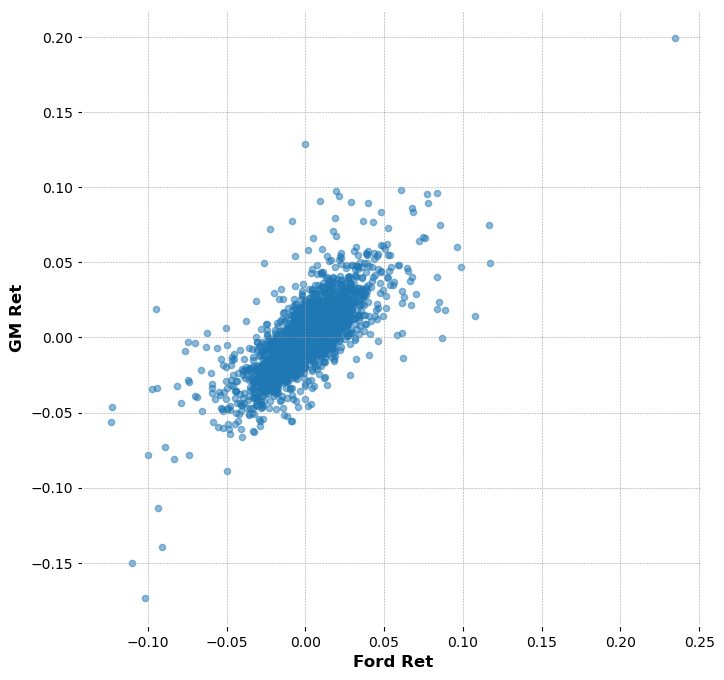

In [48]:
# Generate a scatter plot specifically comparing Ford's and GM's returns
# Setting alpha to 0.5 makes the points semi-transparent to avoid overlap
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.5,figsize=(8,8))

In [44]:
# Calculate the cumulative return for Tesla, Ford, and GM by compounding daily returns
# This shows how an initial investment would grow over time with the stock's daily returns
tesla['Cumulative Return'] = (1+ tesla['returns']).cumprod()
ford['Cumulative Return'] = (1+ ford['returns']).cumprod()
gm['Cumulative Return'] = (1+ gm['returns']).cumprod()

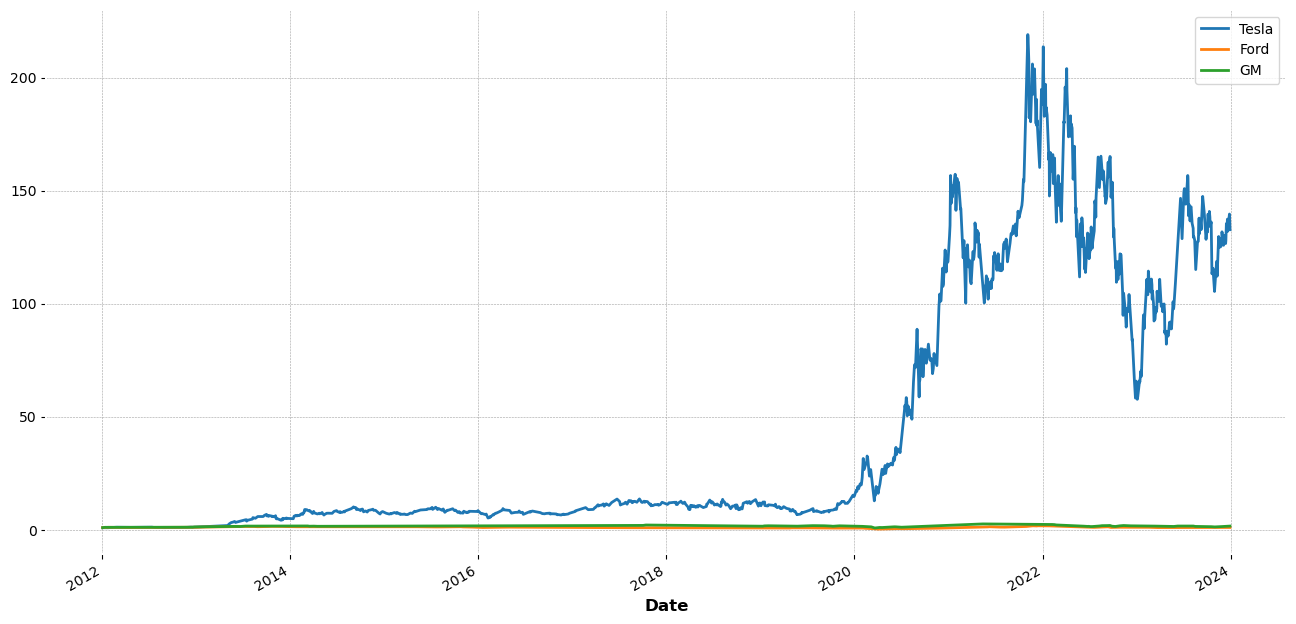

In [35]:
# Plot the cumulative returns for each company to compare long-term performance
# Setting figsize to make the plot larger for better readability
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford',figsize=(16,8))
gm['Cumulative Return'].plot(label='GM')

# Add a legend to distinguish each line
plt.legend()

<Axes: xlabel='Date'>

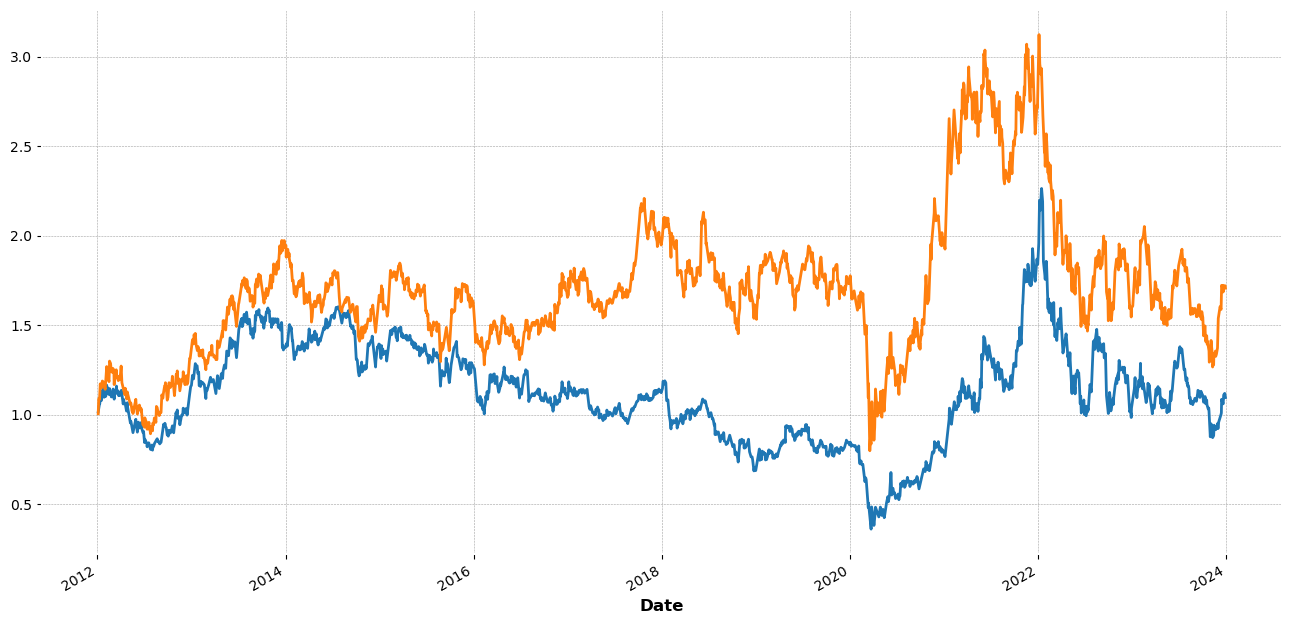

In [46]:
# Additional plot for Ford and GM cumulative returns individually
ford['Cumulative Return'].plot(label='Ford',figsize=(16,8))
gm['Cumulative Return'].plot(label='GM')